In [96]:
import cv2
import numpy as np
from PIL import Image
import albumentations as A
import matplotlib.pyplot as plt
import os
import torch.nn as nn
from albumentations.pytorch import ToTensorV2

In [2]:
!unzip "aladdinpersson Machine-Learning-Collection master ML-Pytorch_Basics_albumentations_tutorial_cat_dogs" -d cats_dogs
r

Archive:  aladdinpersson Machine-Learning-Collection master ML-Pytorch_Basics_albumentations_tutorial_cat_dogs.zip
   creating: cats_dogs/cats/
 extracting: cats_dogs/cats/cat.0.jpg  
 extracting: cats_dogs/cats/cat.1.jpg  
 extracting: cats_dogs/cats/cat.2.jpg  
 extracting: cats_dogs/cats/cat.3.jpg  
 extracting: cats_dogs/cats/cat.4.jpg  
 extracting: cats_dogs/cats/cat.5.jpg  
 extracting: cats_dogs/cats/cat.6.jpg  
 extracting: cats_dogs/cats/cat.7.jpg  
 extracting: cats_dogs/cats/dog.0.jpg  
   creating: cats_dogs/dogs/
 extracting: cats_dogs/dogs/n123686.jpg  
 extracting: cats_dogs/dogs/n123687.jpg  
 extracting: cats_dogs/dogs/n123688.jpg  
 extracting: cats_dogs/dogs/n123689.jpg  
 extracting: cats_dogs/dogs/n123690.jpg  
 extracting: cats_dogs/dogs/n123691.jpg  
 extracting: cats_dogs/dogs/n123692.jpg  
 extracting: cats_dogs/dogs/n123693.jpg  
 extracting: cats_dogs/dogs/n123694.jpg  
 extracting: cats_dogs/dogs/n123695.jpg  


In [3]:
!unzip "images zip" -d images


Archive:  images zip.zip
   creating: images/images/
  inflating: images/images/cat.jpg   
  inflating: images/images/elon.jpeg  
  inflating: images/images/mask.jpeg  
  inflating: images/images/second_mask.jpeg  


In [14]:
image=Image.open("images/images/elon.jpeg")
mask=Image.open("images/images/mask.jpeg")
mask2=Image.open("images/images/second_mask.jpeg")
cat=cv2.imread("/content/images/images/cat.jpg")

In [16]:
cat=cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

In [18]:
boxes=[[13, 170, 224, 410]]

In [49]:
def plot_images(images,boxes=None):
  fig=plt.figure(figsize=(10,10))
  columns=4
  rows=5
  for i in range (len(images)):
    plt.subplot(rows,columns,i+1)
    if boxes is not None :
      x_min,y_min,x_max,y_max=map(int,boxes[i])
      img=images[i]
      cv2.rectangle(img,(x_min,y_min),(x_max,y_max),(255,0,0))
    plt.imshow(img)
    plt.axis("off")
  plt.show()


In [102]:
transform=A.Compose([
    A.Resize(width=1920,height=1080),
    A.Rotate(limit=40,p=0.9,border_mode=cv2.BORDER_CONSTANT),
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.4),
    A.RGBShift(r_shift_limit=25,g_shift_limit=25,b_shift_limit=25,p=0.9),
    A.Normalize(std=(1,1,1),mean=(0,0,0),max_pixel_value=255)


],is_check_shapes=False,bbox_params=A.BboxParams(format="pascal_voc",min_area=2048,min_visibility=0.3,label_fields=[]))

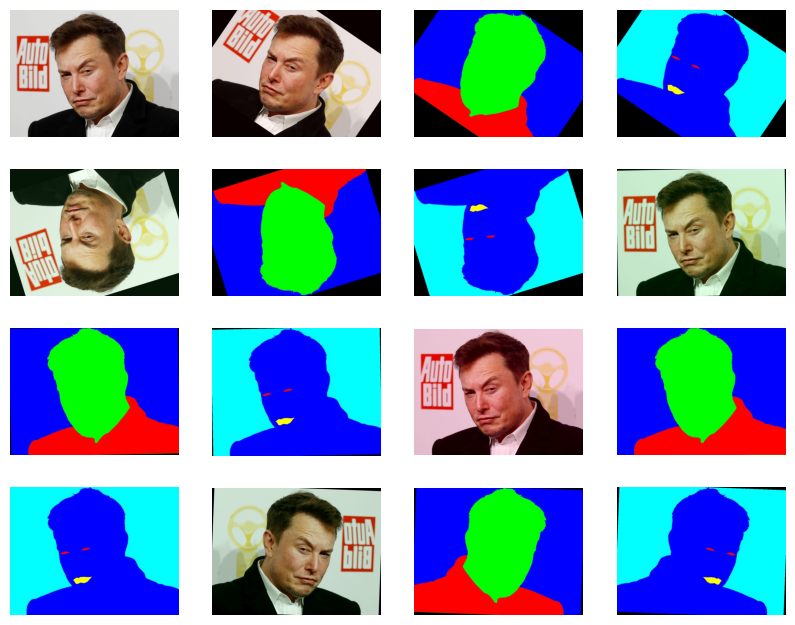

In [8]:
image=np.array(image)
mask=np.array(mask)
mask2=np.array(mask2)
images_list=[image]
for i in range (5):
  trans_image=transform(image= image,masks=[mask,mask2])
  images_list.append(trans_image["image"])
  images_list.append(trans_image["masks"][0])
  images_list.append(trans_image["masks"][1])
plot_images(images_list)

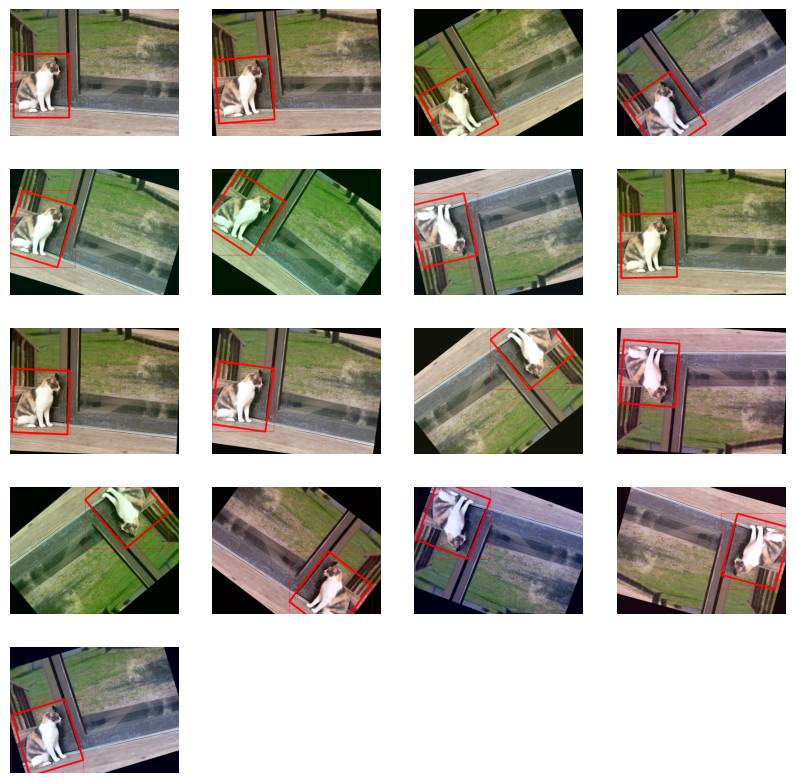

In [50]:
cat=np.array(cat)
images_list=[cat]
boxes_list=[boxes[0]]
for i in range (16):
  trans_image=transform(image= cat,bboxes=boxes)
  images_list.append(trans_image["image"])
  boxes_list.append(trans_image["bboxes"][0])
plot_images(images_list,boxes_list)

17

In [75]:
class Cat_dog(nn.Module):
  def __init__(self,root_dir,transform=None):
    super().__init__()
    self.transform=transform
    self.root_dir=root_dir
    self.data=[]
    self.class_name =os.listdir(self.root_dir)
    for index,name in enumerate(self.class_name):
      files=os.listdir(os.path.join(self.root_dir,name))
      self.data+=list(zip(files,[index]*len(files)))
  def __len__(self):
    return len(self.data)
  def __getitem__(self,index):
    file_name,label=self.data[index]
    dir_path=os.path.join(self.root_dir,self.class_name[label])
    image_path=os.path.join(dir_path,file_name)
    image=np.array(Image.open(image_path))
    if self.transform is not None :
      image =self.transform(image=image)
      image=image["image"]
    return image,label




In [103]:
dataset=Cat_dog(root_dir="cats_dogs",transform=transform)


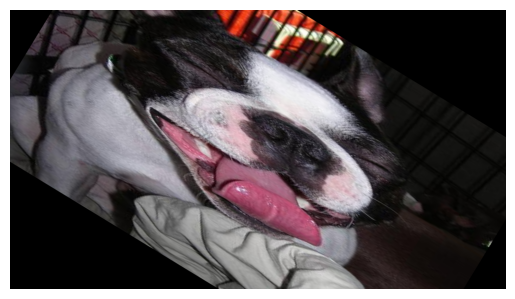

In [106]:
image,label=dataset[4]
plt.imshow(image)
plt.axis("off")
plt.show()